# Neil Shah: CUNY 621 Blog 3
# Simple Linear Model 

In the previous [blog post](https://github.com/shahneilp/DATA621-Blogs/blob/master/Blog2-Relationships.ipynb) I explored the relationship between two prices series, Ethanol and Gasoline, and peformed a graphical comparison and correlation analysis. The basis was my economic theory that ethanol, being a blend component of gasoline, could be correlated with said price, and therefore maybe we can predict movement of ethanol based on gasoline!

I found that there was indeed a correlation between the two price series which varied in time, however recently the correlation seems to be strong.

Let's review

In [1]:
#Importing our friends 
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
#Loading data set
ethanol=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/sampledata.csv',header=0,index_col=0,parse_dates=True)
gasoline=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/blog2sample.csv',header=0,index_col=0,parse_dates=True)
#combining them
df=pd.DataFrame(data=ethanol.copy())
df['Gasoline']=gasoline
df.columns=['Ethanol','Gasoline']
df.head()

,Ethanol,Gasoline
Date,,
2019-01-04,1.2775,1.5455
2019-01-07,1.2625,1.5437
2019-01-08,1.2525,1.5663
2019-01-09,1.2650,1.6316
2019-01-10,1.2600,1.6375


And let's revisit the correlations

(array([737119., 737180., 737241., 737303., 737364., 737425., 737485.,
        737546., 737607., 737669.]),
 <a list of 10 Text major ticklabel objects>)

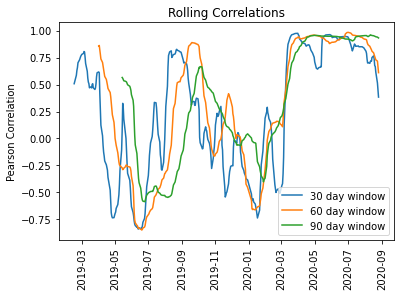

In [3]:
plt.plot((df['Ethanol'].rolling(30).corr(df['Gasoline'])).dropna(),label='30 day window')
plt.plot((df['Ethanol'].rolling(60).corr(df['Gasoline'])).dropna(),label='60 day window')
plt.plot((df['Ethanol'].rolling(90).corr(df['Gasoline'])).dropna(),label='90 day window')
plt.title('Rolling Correlations')
plt.ylabel('Pearson Correlation')
plt.legend(loc='lower right')
plt.xticks(rotation='vertical')

I'm intrigued by the strong correlation post 02-2020 or the pandemic; has there been a regime change? Let's zero in on this range with a scatter plot.

Text(0, 0.5, 'Gasoline Prices')

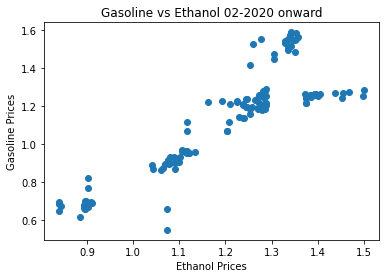

In [5]:
plt.scatter(x=df['Ethanol'].loc['02-2020':],y=df['Gasoline'].loc['02-2020':])
plt.title('Gasoline vs Ethanol 02-2020 onward')
plt.xlabel('Ethanol Prices')
plt.ylabel('Gasoline Prices')

Here we see the data some sort of correlation, but like any real world data it's messy. I think there is a link here and I want to start a rough linear regression which could capture the relationship between Gasoline and Ethanol prices. 

First let's do some data cleaning. 

In [3]:
#Make a clean copy of the data
data=df.loc['02-2020':].copy()
data.describe()

,Ethanol,Gasoline
count,144.000000,144.000000
mean,1.198893,1.121526
std,0.168465,0.273096
min,0.840000,0.546500
25%,1.090000,0.912400
50%,1.250000,1.193750
75%,1.333125,1.260925
max,1.500000,1.588000


We have 144 data points--so this is sufficient to do some analysis. So if this was R we could just use lm(x,y) and boom have a handy model, but since I really want to step up my Python game I want to do this!

There is a package called sklearn that covers it--let's import it

In [4]:
from sklearn.linear_model import LinearRegression

The LinearRegression model performs a simple OLS based on inputs arrays, and can easily handle multiple variables. Since we only have two variables this will be a simple y~x based relationship. 

First let's divide our data up.

In [5]:
X=data['Gasoline'].values
y=data['Ethanol'].values

I'm going to do a linear regression over the entire data set first just to see how it looks--I will use a R^2 value to determine the strength of fit.

In [7]:
#Calling the LR class
lm=LinearRegression()
#Fitting it and rehspaing the data into a flat array
lm.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

Let's first look at the R^2 value and plot the best fit line our model came up with

In [9]:
lm.score(X.reshape(-1,1),y.reshape(-1,1))

0.7770276181537725

Text(0.5, 1.0, 'Ethanol vs Gasoline Best Fit')

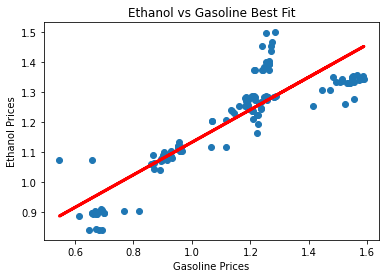

In [12]:
#Plotting the data
plt.scatter(X,y,label='data')
plt.xlabel('Gasoline Prices')
plt.ylabel('Ethanol Prices')
#Using the X data to make our best fit line
y_pred=lm.predict(X.reshape(-1,1))
plt.plot(X,y_pred,color='red',linewidth=3)
plt.title('Ethanol vs Gasoline Best Fit')

We achieved a R^2 of 0.77 which points to a pretty strong. One thing I wanted to check was whether this was statistically significant--I checked the sklearn docs and there wasn't an easy way to do it, but there is another package called statsmodel that can do it and a OLS.

Two packages? Maybe I should of stuck with R!

I'll do the exact same OLS fit in stats model 

In [16]:
#Adding an intercept since stastmodel does not default to one
X_ = sm.add_constant(X)
model=sm.OLS(y,X_).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     494.9
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           4.03e-48
Time:                        14:27:58   Log-Likelihood:                 160.69
No. Observations:                 144   AIC:                            -317.4
Df Residuals:                     142   BIC:                            -311.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5890      0.028     20.880      0.000       0.533       0.645
x1             0.5438      0.024     22.245      0.000       0.495       0.592
==============================================================================
Omnibus:                        8.274   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.373
Skew:                           0.589   Prob(JB):                       0.0152
Kurtosis:                       3.099   Cond. No.                         8.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-squared are the same (which is good) and this summary gives us a ton of extra information. Looking at the t-test table and assuming an alpha of .05, our p value is 0, which is far less than .05. 

The null hypothesis is that there is not a linear relationship between Gasoline Prices and Ethanol; since our p value is less than 0.05, we can reject the null and say there is.

Now I made one big error in this model--I fit the entire data set, and that means overfitting! Over fitting is a real concern and occurs when the model learns all the nuances of the data. 

To properly guard against that we will employ a test/train split (insample and out of sample split) to test our model. This is really easy to do in Sklearn.

In [18]:
#Import package
from sklearn.model_selection import train_test_split

In [23]:
#Make a test train split using 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Fit data
lm.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
#Predict
y_pred=lm.predict(X_test.reshape(-1,1))
lm.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

0.5829701948873769

Here we split our data in test/train 80/20 split and our R^2 was 0.58; This definitely wasn't the .77!

Now this one was one split--but to make things interesting I'll use some Python code to loop over and do many test-train iterations and see the distribution of R^2

Let's run it 50 times

In [28]:
#First to make sure I don't to keep using reshape(-1,1)
X=X.reshape(-1,1)
y=y.reshape(-1,1)
#Making an empty list of Rsquared
rsquare=[]
#running n iterations
for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    lm.fit(X_train,y_train)
    y_pred=lm.predict(X_test)
    rsquare.append(lm.score(y_test,y_pred))
rsquare

[0.6729437992242715,
 0.6045486885275316,
 0.569769959919328,
 0.5815980528461613,
 0.5990897397479553,
 0.6938649202996003,
 0.6202229346791381,
 0.6600779063373758,
 0.6682908124138125,
 0.5624710036533904,
 0.5128405036451746,
 0.5651226103092801,
 0.6400290888677149,
 0.721374316215745,
 0.5587077934286164,
 0.5705095930567485,
 0.5435967840438729,
 0.6408902116194023,
 0.5621496270367419,
 0.6073918078249143,
 0.6548622216797189,
 0.6337006818317947,
 0.5053926070469079,
 0.6659074680472821,
 0.5561207105127193,
 0.7405555578803772,
 0.5479047396285367,
 0.6100935897122336,
 0.6419378907473293,
 0.5547504160970351,
 0.580217159858513,
 0.5385164682927739,
 0.5973800187081866,
 0.5789840725045907,
 0.6697861248067912,
 0.6686626604517368,
 0.6298537450124777,
 0.582093493091165,
 0.6370127968486292,
 0.6363019284940251,
 0.6388693377726897,
 0.6762607269842181,
 0.6461647030738438,
 0.4985296863691455,
 0.6426563609652778,
 0.6980364397029298,
 0.6017473556867138,
 0.61481885614370

0.6151711320938711

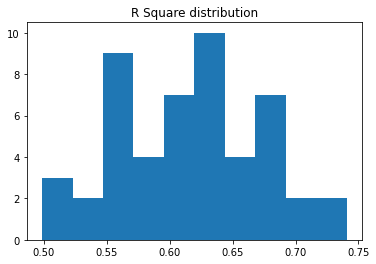

In [36]:
#Let's look at the mean Rsqaure
import statistics 
plt.hist(rsquare)
plt.title('R Square distribution')
statistics.mean(rsquare)

So here we did 50 iterations of different parts of the data for the test/train split and from the distribution/mean of our Rsquare above, there is a R^2 of around .60. 

This reiterates my belief that there is a fundamental link between the two prices and that maybe our linear model can work!

I want to note that this was a quick and dirty case, and that we did no pre-processing/data analysis/feature selection.

Maybe next time!? Stay tuned!